## Лабороторная работа №3 по курсу ТМО
### "Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных."

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка и первичный анализ данных
[База Данных Рекомендаций Аниме](https://www.kaggle.com/CooperUnion/anime-recommendations-database).
Данные о рекомендациях пользователей по адресу myanimelist.net.
Этот набор данных содержит информацию о пользовательских предпочтениях от 73 516 пользователей на 12 294 аниме.

In [27]:
data = pd.read_csv('anime.csv', sep = ",")
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [28]:
data.shape

(12294, 7)

In [29]:
data.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [30]:
# проверим есть ли пропущенные значения
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [31]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 12294


### 1. Обработка пропусков в данных
#### 1.1. Простые стратегии - удаление или заполнение нулями

In [32]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((12294, 7), (12294, 4))

In [33]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((12294, 7), (12017, 7))

In [36]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)

#### 1.2. "Внедрение значений" - импьютация (imputation)
#### 1.2.1. Обработка пропусков в числовых данных


In [37]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка rating. Тип данных float64. Количество пустых значений 230, 1.87%.


In [39]:
# Фильтр по колонке с пропущенными значениями
data_num = data[num_cols]
data_num

,rating
0,9.37
1,9.26
2,9.25
3,9.17
4,9.16
...,...
12289,4.15
12290,4.28
12291,4.88
12292,4.98


c:\python_3.7.4\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\python_3.7.4\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


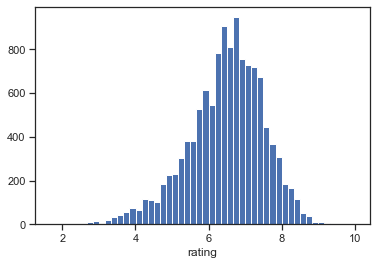

In [40]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [41]:
# Фильтр по пустым значениям поля rating
data[data['rating'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10,NaN,32
9657,34309,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,Unknown,NaN,129
10896,34096,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,Unknown,NaN,13383
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [43]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['rating'].isnull()].index
flt_index

Int64Index([ 8968,  9657, 10896, 10897, 10898, 10899, 10900, 10901, 10902,
            10903,
            ...
            12252, 12257, 12259, 12261, 12265, 12274, 12279, 12280, 12282,
            12285],
           dtype='int64', length=230)

In [44]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,anime_id,name,genre,type,episodes,rating,members
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10,NaN,32
9657,34309,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,Unknown,NaN,129
10896,34096,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,Unknown,NaN,13383
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [45]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['rating']

8968    NaN
9657    NaN
10896   NaN
10897   NaN
10898   NaN
         ..
12274   NaN
12279   NaN
12280   NaN
12282   NaN
12285   NaN
Name: rating, Length: 230, dtype: float64

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html#impute

In [46]:
data_num_rating = data_num[['rating']]
data_num_rating.head()

,rating
0,9.37
1,9.26
2,9.25
3,9.17
4,9.16


In [47]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [48]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_rating)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

С помощью класса SimpleImputer можно проводить импьютацию различными показателями центра распределения.

In [49]:
strategies=['mean', 'median','most_frequent']

In [50]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_rating)
    return data_num_imp[mask_missing_values_only]

In [51]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390169, 6.47390169, 6.47390169,
        6.47390169, 6.47390169, 6.47390

In [52]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57, 6.57,
        6.57, 6.57, 6.57, 6

In [53]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.

In [54]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [55]:
data[['rating']].describe()

,rating
count,12064.000000
mean,6.473902
std,1.026746
min,1.670000
25%,5.880000
50%,6.570000
75%,7.180000
max,10.000000


In [56]:
test_num_impute_col(data, 'rating', strategies[0])

('rating', 'mean', 230, 6.473901690981432, 6.473901690981432)

In [57]:
test_num_impute_col(data, 'rating', strategies[1])

('rating', 'median', 230, 6.57, 6.57)

In [58]:
test_num_impute_col(data, 'rating', strategies[2])

('rating', 'most_frequent', 230, 6.0, 6.0)

#### 1.2.2. Обработка пропусков в категориальных данных


In [59]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка genre. Тип данных object. Количество пустых значений 62, 0.5%.
Колонка type. Тип данных object. Количество пустых значений 25, 0.2%.


Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".

In [70]:
cat_temp_data = data[['type']]
cat_temp_data.head()

,type
0,Movie
1,TV
2,TV
3,TV
4,TV


In [71]:
cat_temp_data['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [72]:
cat_temp_data[cat_temp_data['type'].isnull()].shape

(25, 1)

In [73]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Movie'],
       ['TV'],
       ['TV'],
       ...,
       ['OVA'],
       ['OVA'],
       ['Movie']], dtype=object)

In [74]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV'], dtype=object)

In [78]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Movie'],
       ['TV'],
       ['TV'],
       ...,
       ['OVA'],
       ['OVA'],
       ['Movie']], dtype=object)

In [79]:
np.unique(data_imp3)

array(['!!!', 'Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV'],
      dtype=object)

In [80]:
data_imp3[data_imp3=='!!!'].size

25

### 2. Преобразование категориальных признаков в числовые


In [81]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Movie
1,TV
2,TV
3,TV
4,TV
...,...
12289,OVA
12290,OVA
12291,OVA
12292,OVA


#### 2.1. Кодирование категорий целочисленными значениями - label encoding.

In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [83]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [84]:
cat_enc['c1'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [85]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5])

In [86]:
le.inverse_transform([0, 1, 2, 3, 4, 5])

array(['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV'], dtype=object)

#### 2.2. Кодирование категорий наборами бинарных значений - one-hot encoding

In [87]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [88]:
cat_enc.shape

(12294, 1)

In [89]:
cat_enc_ohe

<12294x6 sparse matrix of type '<class 'numpy.float64'>'
	with 12294 stored elements in Compressed Sparse Row format>

In [90]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [91]:
cat_enc.head(10)

,c1
0,Movie
1,TV
2,TV
3,TV
4,TV
5,TV
6,TV
7,OVA
8,Movie
9,TV


#### 2.3. Pandas get_dummies - быстрый вариант one-hot кодирования.

In [92]:
pd.get_dummies(cat_enc).head()

,c1_Movie,c1_Music,c1_ONA,c1_OVA,c1_Special,c1_TV
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [93]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_nan
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


### 3. Масштабирование данных


In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

#### 3.1. MinMax масштабирование


In [100]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['members']])

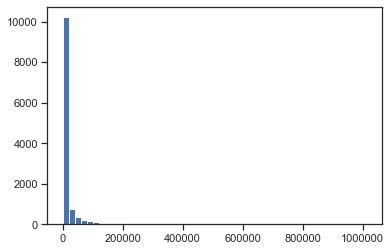

In [101]:
plt.hist(data['members'], 50)
plt.show()

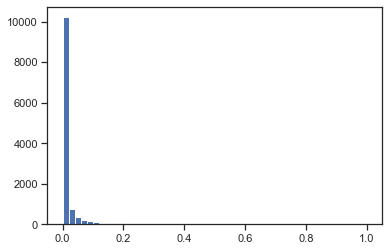

In [102]:
plt.hist(sc1_data, 50)
plt.show()

#### 3.2. Масштабирование данных на основе Z-оценки - StandardScaler


In [103]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['members']])

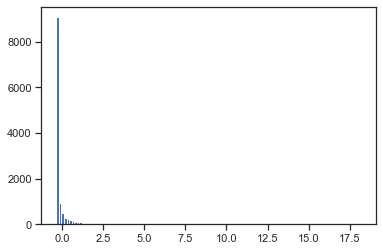

In [110]:
plt.hist(sc2_data, 120)
plt.show()

#### 3.3. Нормализация данных


In [111]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['members']])

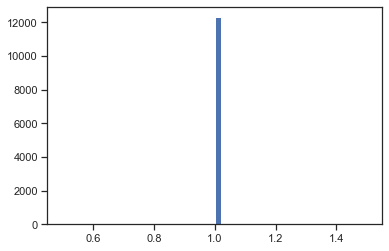

In [112]:
plt.hist(sc3_data, 50)
plt.show()